# Projeto do Módulo | Estatística

. Turma: 735 | Grupo formado por:

    - Adelaide Adurens Kono  
    - Flavio Quirino  
    - Pedro Bastos Sant Ana  

### Contextualização


A Autoridade De Estatística das Filipinas (PSA) lidera a realização da Pesquisa de Renda e Despesa Familiar (FIES) em todo o país. A pesquisa, realizada a cada 3 (três) anos, tem como objetivo fornecer dados sobre renda e despesas familiares, incluindo, entre outros, níveis de consumo por item de despesa, fontes de renda em dinheiro e informações relacionadas que afetam a renda e níveis de despesas e padrões nas Filipinas. Dessa forma, pede-se que seja elaborado um relatório prévio com insights e análise de dados por parte de um cientista de dados.

In [1]:
# Importação de bibliotecas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import norm
from statsmodels.stats.weightstats import DescrStatsW, CompareMeans
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split

In [6]:
# Carregando dataset

df = pd.read_csv("https://s3-sa-east-1.amazonaws.com/lcpi/97fe77d1-2aec-4660-a799-c6eaccd14ea7.csv")
df.head()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1


In [5]:
df.columns

Index(['Total Household Income', 'Region', 'Total Food Expenditure',
       'Main Source of Income', 'Agricultural Household indicator',
       'Bread and Cereals Expenditure', 'Total Rice Expenditure',
       'Meat Expenditure', 'Total Fish and  marine products Expenditure',
       'Fruit Expenditure', 'Vegetables Expenditure',
       'Restaurant and hotels Expenditure', 'Alcoholic Beverages Expenditure',
       'Tobacco Expenditure', 'Clothing, Footwear and Other Wear Expenditure',
       'Housing and water Expenditure', 'Imputed House Rental Value',
       'Medical Care Expenditure', 'Transportation Expenditure',
       'Communication Expenditure', 'Education Expenditure',
       'Miscellaneous Goods and Services Expenditure',
       'Special Occasions Expenditure', 'Crop Farming and Gardening expenses',
       'Total Income from Entrepreneurial Acitivites', 'Household Head Sex',
       'Household Head Age', 'Household Head Marital Status',
       'Household Head Highest Grade Compl

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41544 entries, 0 to 41543
Data columns (total 60 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Total Household Income                         41544 non-null  int64 
 1   Region                                         41544 non-null  object
 2   Total Food Expenditure                         41544 non-null  int64 
 3   Main Source of Income                          41544 non-null  object
 4   Agricultural Household indicator               41544 non-null  int64 
 5   Bread and Cereals Expenditure                  41544 non-null  int64 
 6   Total Rice Expenditure                         41544 non-null  int64 
 7   Meat Expenditure                               41544 non-null  int64 
 8   Total Fish and  marine products Expenditure    41544 non-null  int64 
 9   Fruit Expenditure                              41544 non-null

### Milestone 1 - Amostra e Descrição

1. Calcule o tamanho de amostra ideal, considerando que você deseja estimar a média de dinheiro gasto com saúde (Medical Care Expenditure) com um erro máximo de 500, e um nível de confiança de 95%.

In [7]:
sigma = df['Medical Care Expenditure'].std()
erro_maximo = 500
confianca = 0.95
significancia = 1 - confianca

In [8]:
z_alpha_2 = norm.ppf(0.95 + (0.05 / 2))
z_alpha_2

1.959963984540054

In [9]:
n_minimo = (z_alpha_2 * sigma / erro_maximo)**2

In [10]:
n = round(np.ceil(n_minimo))
print(f"O valor da amostra ideal é de {n}")

O valor da amostra ideal é de 11121


2. Obtenha uma amostra do dataset, considerando o tamanho da amostra que você calculou anteriormente e, em seguida, faça uma análise descritiva dos dados com, pelo menos, 10 variáveis quantitativas.

In [11]:
amostra = df.sample(n, random_state = 101)
amostra.head()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
1849,162566,V - Bicol Region,85025,Enterpreneurial Activities,1,28108,22932,3614,10058,3750,...,0,0,0,0,0,3,0,0,0,0
29179,218765,IVA - CALABARZON,71775,Other sources of Income,0,30273,20091,7180,4092,1300,...,1,0,0,0,0,3,0,0,0,0
20513,551982,NCR,214203,Wage/Salaries,0,21228,12326,48055,17536,660,...,1,1,0,0,0,3,2,0,0,0
28910,443465,I - Ilocos Region,223936,Other sources of Income,0,66348,51000,36404,12411,2172,...,1,1,0,0,0,3,1,0,0,1
2162,144350,ARMM,80055,Enterpreneurial Activities,1,31586,24864,280,15975,2798,...,0,0,0,0,0,2,0,0,1,0


## Exemplos de variáveis QUANTITATIVAS DISCRETAS:

**Total Number of Family members**

**Total number of family members employed**

**Number of bedrooms**

**Number of Washing Machine**

**Number of Personal Computer** 

## Exemplos de variáveis QUANTITATIVAS CONTÍNUAS:

**Total Household Income**

**Total Rice Expenditure**

**Transportation Expenditure** 

**Special Occasions Expenditure** 

**Total Income from Entrepreneurial Acitivites**

In [12]:
amostra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11121 entries, 1849 to 25721
Data columns (total 60 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Total Household Income                         11121 non-null  int64 
 1   Region                                         11121 non-null  object
 2   Total Food Expenditure                         11121 non-null  int64 
 3   Main Source of Income                          11121 non-null  object
 4   Agricultural Household indicator               11121 non-null  int64 
 5   Bread and Cereals Expenditure                  11121 non-null  int64 
 6   Total Rice Expenditure                         11121 non-null  int64 
 7   Meat Expenditure                               11121 non-null  int64 
 8   Total Fish and  marine products Expenditure    11121 non-null  int64 
 9   Fruit Expenditure                              11121 non-n

### Milestone 2 - Inferência Estatística

1. Utilizando um nível de confiança de 95%, calcule o intervalo de confiança do dinheiro gasto com saúde e educação (colunas: Medical Care Expenditure e Education Expenditure).

In [13]:
confianca = 0.95
significancia = 1 - confianca
media_saude = amostra['Medical Care Expenditure'].mean()
n_saude = len(amostra['Medical Care Expenditure'])
sigma_saude = amostra['Medical Care Expenditure'].std()

media_educacao = amostra['Education Expenditure'].mean()
n_educacao = len(amostra['Education Expenditure'])
sigma_educacao = amostra['Education Expenditure'].std()

In [16]:
# Intervalo de confiança gasto com saúde

intervalo_conf_saude = norm.interval(confianca, loc=media_saude, scale=sigma_saude / np.sqrt(n_saude))

print(f"O intervalo de confiança para gastos com saúde é de {intervalo_conf_saude}") 

O intervalo de confiança para gastos com saúde é de (6673.014229441167, 7605.871482275405)


In [17]:
# Intervalo de confiança gasto com educação

intervalo_conf_educacao = norm.interval(confianca, loc=media_educacao, scale=sigma_educacao / np.sqrt(n_educacao))

print(f"O intervalo de confiança para gastos com educação é de {intervalo_conf_educacao}") 

O intervalo de confiança para gastos com educação é de (6923.435952773181, 7650.380610485519)


2. Calcule se há diferença de média de número total de membros da família pelo sexo do chefe de família (Household Head Sex e Total Number of Family members) com 95% de confiança.

In [36]:
amostra['Household Head Sex'].value_counts()

Male      8691
Female    2430
Name: Household Head Sex, dtype: int64

In [37]:
female_head = amostra[amostra['Household Head Sex'] == 'Female']
female_head.shape

(2430, 60)

In [38]:
male_head = amostra[amostra['Household Head Sex'] == 'Male']
male_head.shape

(8691, 60)

In [39]:
media_m = male_head['Total Number of Family members'].mean()
desvio_m = male_head['Total Number of Family members'].std()

media_m, desvio_m

(4.861350822690139, 2.257882949418086)

In [40]:
media_f = female_head['Total Number of Family members'].mean()
desvio_f = female_head['Total Number of Family members'].std()

media_f, desvio_f

(3.8465020576131685, 2.2499023598492838)

In [41]:
nM = len(male_head)
nF = len(female_head)
D0 = 0
confianca = 0.95
significancia = 1 - confianca #alpha

In [42]:
z_alpha_2 = norm.ppf(0.95 + (0.05 / 2))
z_alpha_2

1.959963984540054

In [43]:
numerador = (media_m - media_f) - D0
denominador = np.sqrt((desvio_m **2 / nM) + (desvio_f**2 / nF))

In [44]:
z = numerador / denominador
z

19.641145336535892

In [45]:
p_value = norm.sf(z) * 2
p_value

6.882826265315254e-86

In [46]:
# Rejeitar H0 se z >= z_alpha_2

z >= z_alpha_2

True

In [47]:
# Rejeitar H0 se p_value <= alpha

p_value <= significancia

True

### $\mu_1 \Rightarrow$ Média do total de membros de família com chefes de domicílios do sexo masculino
### $\mu_2 \Rightarrow$ Média do total de membros de família com chefes de domicílios do sexo feminino



### $
\begin{cases}
H_0: \mu_1 -\mu_2 = 0\\
H_1: \mu_1 -\mu_2 != 0
\end{cases}
$

In [48]:
teste_male = DescrStatsW(male_head['Total Number of Family members'])

In [49]:
teste_female = DescrStatsW(female_head['Total Number of Family members'])

In [50]:
teste = CompareMeans(teste_male, teste_female)

In [51]:
teste.ztest_ind()

(19.602027594446085, 1.4858393205614605e-85)

### Com base no estudo há diferença de média de número total de membros da família pelo sexo do chefe de família

3. Verifique se há diferença de média total de renda da família (Total Household Income) de acordo com a fonte salarial (Main Source of Income).

Considere “Enteroreneurial activities” e “other sources of income” como "outros".

In [52]:
amostra['Main Source of Income'].value_counts()

Wage/Salaries                 5517
Other sources of Income       2887
Enterpreneurial Activities    2717
Name: Main Source of Income, dtype: int64

In [53]:
amostra['Main Source of Income'].replace(['Other sources of Income', 'Enterpreneurial Activities'], 'Other', inplace = True)

In [54]:
amostra['Main Source of Income'].value_counts()

Other            5604
Wage/Salaries    5517
Name: Main Source of Income, dtype: int64

In [55]:
wage = amostra[amostra['Main Source of Income'] == 'Wage/Salaries']
wage.shape

(5517, 60)

In [56]:
other = amostra[amostra['Main Source of Income'] == 'Other']
other.shape

(5604, 60)

### $\mu_1 \Rightarrow$ Média do total da renda da familia assalariada
### $\mu_2 \Rightarrow$ Média do total da renda da familia com outras atividades



### $
\begin{cases}
H_0: \mu_1 -\mu_2 = 0\\
H_1: \mu_1 -\mu_2 != 0
\end{cases}
$

In [57]:
teste_wage = DescrStatsW(wage['Total Household Income'])

In [58]:
teste_other = DescrStatsW(other['Total Household Income'])

In [59]:
teste = CompareMeans(teste_wage, teste_other)

In [60]:
z, p_value = teste.ztest_ind()
z, p_value

(7.059219960270567, 1.6743984879045323e-12)

### Não foi fornecido confiança e significância para poder comparar, logo consideramos 95% de confiança

In [61]:
# Rejeitar H0 se z >= z_alpha_2

z >= z_alpha_2

True

In [62]:
# Rejeitar H0 se p_value <= alpha

p_value <= significancia

True

### Com base no estudo há diferença de média da renda entre família assalariadas e famílias com outros tipos de renda

### Milestone 3 - Previsão de Renda Com Regressão Linear

Usando Regressão Linear, crie um modelo de previsão de renda de forma a minimizar o erro. Considere 70% dos dados para treinar o modelo, e 30% para testá-lo. Por fim, utilize as métricas de avaliação do modelo que foram estudadas para validá-lo.

In [63]:
amostra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11121 entries, 1849 to 25721
Data columns (total 60 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Total Household Income                         11121 non-null  int64 
 1   Region                                         11121 non-null  object
 2   Total Food Expenditure                         11121 non-null  int64 
 3   Main Source of Income                          11121 non-null  object
 4   Agricultural Household indicator               11121 non-null  int64 
 5   Bread and Cereals Expenditure                  11121 non-null  int64 
 6   Total Rice Expenditure                         11121 non-null  int64 
 7   Meat Expenditure                               11121 non-null  int64 
 8   Total Fish and  marine products Expenditure    11121 non-null  int64 
 9   Fruit Expenditure                              11121 non-n

In [64]:
# Função para ver quais colunas possuem mais correlação com a renda para serem usadas na regressão

colunas = []

for column in amostra.columns:
    
    if amostra[column].dtype == 'int64':
        correlacao, p_value = pearsonr(amostra['Total Household Income'], amostra[column])

        if correlacao > 0.6:
            colunas.append(column)
colunas    

['Total Household Income',
 'Total Food Expenditure',
 'Clothing, Footwear and Other Wear Expenditure',
 'Housing and water Expenditure',
 'Imputed House Rental Value',
 'Transportation Expenditure',
 'Communication Expenditure',
 'Miscellaneous Goods and Services Expenditure']

In [65]:
# Preparação das variáveis para aplicação do LinearRegression

X = amostra[['Total Food Expenditure',
 'Clothing, Footwear and Other Wear Expenditure',
 'Housing and water Expenditure',
 'Transportation Expenditure',
 'Communication Expenditure',
 'Miscellaneous Goods and Services Expenditure']]
y = amostra['Total Household Income']

In [66]:
lr = LinearRegression().fit(X,y)

In [67]:
y_est = lr.predict(X)

In [68]:
lr.score(X,y)

0.7477896723387221

In [69]:
r2_score(y,y_est)

0.7477896723387221

In [70]:
x = sm.add_constant(X)

model = sm.OLS(y, x).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Total Household Income   R-squared:                       0.748
Model:                                OLS   Adj. R-squared:                  0.748
Method:                     Least Squares   F-statistic:                     5492.
Date:                    Thu, 16 Dec 2021   Prob (F-statistic):               0.00
Time:                            11:16:00   Log-Likelihood:            -1.4776e+05
No. Observations:                   11121   AIC:                         2.955e+05
Df Residuals:                       11114   BIC:                         2.956e+05
Df Model:                               6                                         
Covariance Type:                nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                          7113.5947   2764.630      2.573      0.010    1694.428    1.25e+04
Total Food Expenditure                            0.7642      0.039     19.806      0.000       0.689       0.840
Clothing, Footwear and Other Wear Expenditure     5.3289      0.236     22.537      0.000       4.865       5.792
Housing and water Expenditure                     1.6680      0.031     53.795      0.000       1.607       1.729
Transportation Expenditure                        2.7349      0.104     26.354      0.000       2.531       2.938
Communication Expenditure                         4.4771      0.293     15.271      0.000       3.902       5.052
Miscellaneous Goods and Services Expenditure      2.7639      0.113     24.367      0.000       2.542       2.986
==============================================================================
Omnibus:                    16996.005   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         18787897.729
Skew:                           9.236   Prob(JB):                         0.00
Kurtosis:                     203.511   Cond. No.                     2.38e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.38e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Análise dos resíduos (com outliers):

In [71]:
model.resid.mean()

2.745144680864615e-10

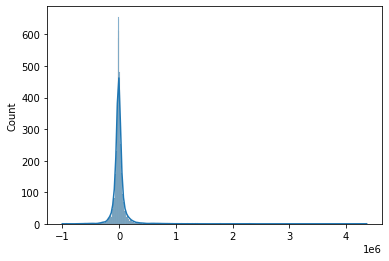

In [73]:
sns.histplot(model.resid, kde = True);

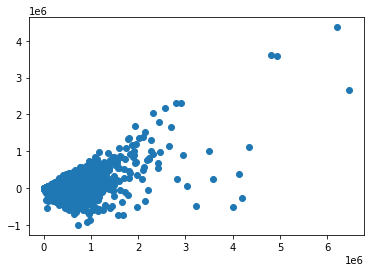

In [74]:
plt.scatter(y, model.resid);

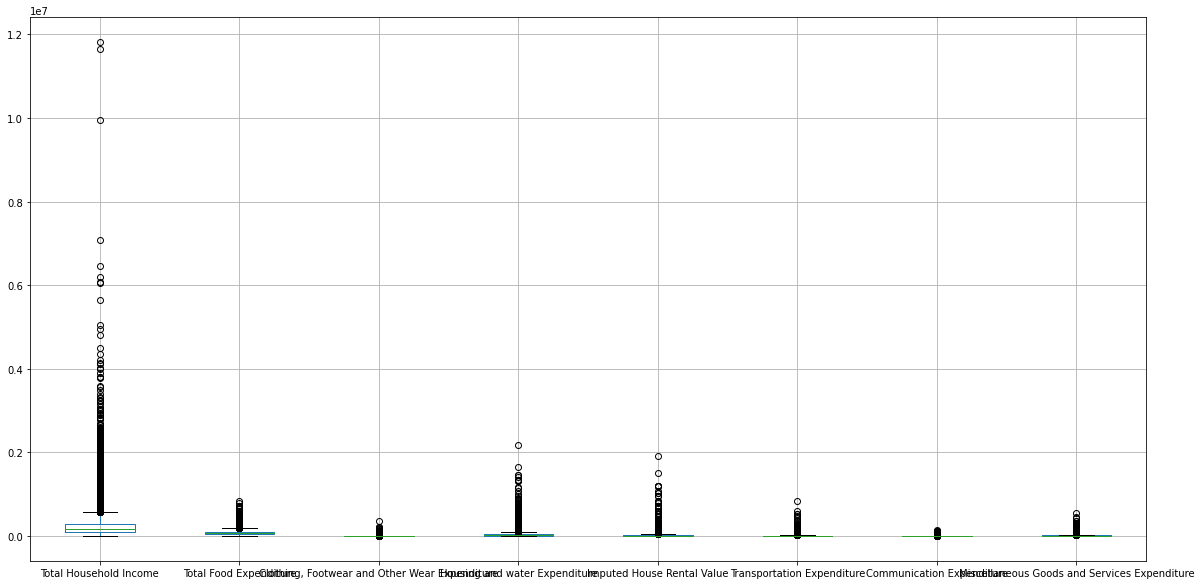

In [75]:
df.boxplot(column = colunas, figsize = (20,10));

In [76]:
# Função para retirar outliers

def calc_min_and_max_range(dados_coluna):
    Q1 = dados_coluna.quantile(q=0.25) # Primeiro quartil
    Q3 = dados_coluna.quantile(q=0.75) # Terceiro quartil

    IQR = Q3 - Q1 # Intervalo interquartílico

    inf = Q1 - 1.5 * IQR
    sup = Q3 + 1.5 * IQR

    return inf, sup

In [77]:
for coluna in colunas:
    inf, sup = calc_min_and_max_range(df[coluna])
    
    # Filtro para pegar apenas as linhas cujos dados estão dentro do intervalo aceitável (não outliers)
    amostra = amostra[(amostra[coluna] >= inf) & (amostra[coluna] <= sup)]

### Separando 70% para treino e 30% para teste

In [78]:
# Preparação das variáveis, sem outliers, para fazer o modelo separando dados de treino e de teste

X_final = amostra[['Total Food Expenditure',
 'Clothing, Footwear and Other Wear Expenditure',
 'Housing and water Expenditure',
 'Transportation Expenditure',
 'Communication Expenditure',
 'Miscellaneous Goods and Services Expenditure']]
y_final = amostra['Total Household Income']

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.3, random_state=101)

In [80]:
X_train.shape

(5933, 6)

In [81]:
X_final.shape

(8477, 6)

In [82]:
X_test.shape

(2544, 6)

In [83]:
lr_final = LinearRegression().fit(X_train, y_train)

In [84]:
y_est_final = lr_final.predict(X_test)

In [85]:
r2_score(y_test, y_est_final)

0.6597460803665744

In [86]:
lr.score(X_train, y_train)

0.6679968836588299

In [87]:
x = sm.add_constant(X_final)

model = sm.OLS(y_final, x).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Total Household Income   R-squared:                       0.674
Model:                                OLS   Adj. R-squared:                  0.673
Method:                     Least Squares   F-statistic:                     2914.
Date:                    Thu, 16 Dec 2021   Prob (F-statistic):               0.00
Time:                            11:17:07   Log-Likelihood:            -1.0365e+05
No. Observations:                    8477   AIC:                         2.073e+05
Df Residuals:                        8470   BIC:                         2.074e+05
Df Model:                               6                                         
Covariance Type:                nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                          9459.3961   1350.178      7.006      0.000    6812.718    1.21e+04
Total Food Expenditure                            0.9559      0.024     40.063      0.000       0.909       1.003
Clothing, Footwear and Other Wear Expenditure     3.7842      0.275     13.767      0.000       3.245       4.323
Housing and water Expenditure                     1.5600      0.044     35.466      0.000       1.474       1.646
Transportation Expenditure                        1.4045      0.110     12.762      0.000       1.189       1.620
Communication Expenditure                         4.8953      0.429     11.421      0.000       4.055       5.736
Miscellaneous Goods and Services Expenditure      2.4883      0.148     16.817      0.000       2.198       2.778
==============================================================================
Omnibus:                     3400.966   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22241.373
Skew:                           1.790   Prob(JB):                         0.00
Kurtosis:                      10.082   Cond. No.                     2.00e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Análise dos resíduos da regressão sem outliers e com treino em 70% dos dados

In [88]:
model.resid.mean()

2.7349429446542488e-11

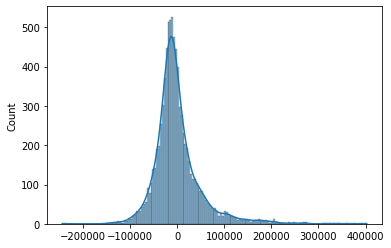

In [90]:
sns.histplot(model.resid, kde = True);

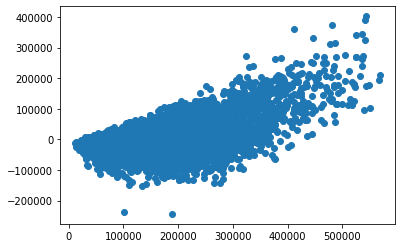

In [91]:
plt.scatter(y_final, model.resid);

In [94]:
# R-QUADRADO  (é bom quando é bem próximo a 1)

from sklearn.metrics import r2_score

In [95]:
r2_score(y_test, y_est_final)

0.6597460803665744

In [96]:
# MAE

from sklearn.metrics import mean_absolute_error

In [97]:
mean_absolute_error(y_test, y_est_final)

33894.23117621262

In [98]:
# MSE 

from sklearn.metrics import mean_squared_error as MSE

In [99]:
MSE(y_test, y_est_final)

2617397397.6983314

In [100]:
# RMSE

from sklearn.metrics import mean_squared_log_error

In [101]:
mean_squared_log_error(y_test, y_est_final)

0.07865323733175075